In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
from scipy.optimize import minimize_scalar
import math

In [181]:
def f(x, b):
    return (norm.pdf(x) * 2)/(2 - np.e**(-1/b) - np.e**(-2/b))

def g(x, b):
    return (np.e**(-abs(x)/b))/ (b* (2 - np.e**(-1/b)) - np.e**(-2/b))

def inv_G(x, b):
    return -b * np.log(1 - x*(1 - np.e**(-2/b)))

def inv2_G(x, b):
    return b * np.log(np.e**(-1/b) + x*(1 - np.e**(-1/b)))

def h1(x, b):
    return (2 * b * (np.e**((-b*x**2 + 2 * x)/(2*b))))/np.sqrt(math.pi * 2)

def h2(x, b):
    return (2 * b * (np.e**((-b*x**2 - 2 * x)/(2*b))))/np.sqrt(math.pi * 2)

def M_func(b):
    return (2 * b * np.e**(1/(2*b**2)))/np.sqrt(math.pi * 2)

In [182]:
res = minimize_scalar(lambda x: M_func(x), bounds=(-1, 2), method='bounded')
b = round(res.x)

M = M_func(b)
ratio = (1-np.e**(-1/b))/(2 - np.e**(-1/b) - np.e**(-2/b))
print("b is : ", b)
print("M is : ", M)

samples = np.zeros(shape=(100000, ))
iteration = 0
while iteration < 100000:
    x = random.uniform(0, 1)
    u = random.uniform(0, 1)
    u2 = random.uniform(0, 1)
    
    if u2 >= ratio:
        y = inv_G(x, b)
        if u <= h1(y, b)/M:
            samples[iteration] = y
            iteration += 1
        else:
            continue
    else:
        y = inv2_G(x, b)
        if u <= h2(y, b)/M:
            samples[iteration] = y
            iteration += 1
        else:
            continue

b is :  1
M is :  1.315489246958914


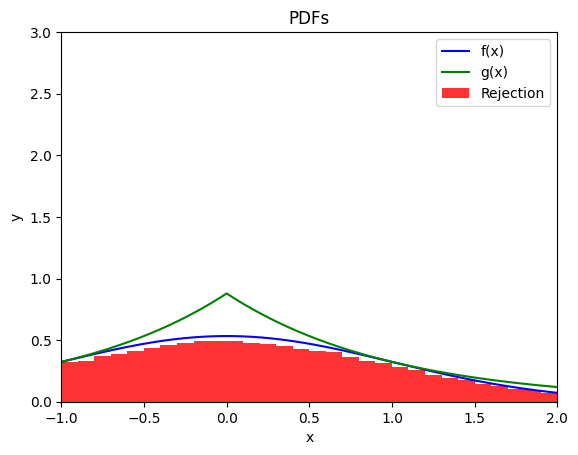

In [183]:
# Generate x and y values for f(x)
z = np.linspace(-1, 2, 1000)
f_y = [f(xi, b) for xi in z]
g_y = [g(xi, b)*M for xi in z]

# Plot f
plt.plot(z, f_y, label='f(x)', color = 'b')

# Plot g
plt.plot(z, g_y, label='g(x)', color = 'g')

# Plot the histogram
plt.hist(samples, bins=30, density=True, color = 'r', alpha=0.8, label='Rejection')

plt.title('PDFs')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,2)
plt.ylim(0,3)
plt.legend()
plt.show()